<a href="https://colab.research.google.com/github/Weddy93/Iris.AI.week3/blob/main/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 32ms/step - accuracy: 0.9100 - loss: 0.2950 - val_accuracy: 0.9847 - val_loss: 0.0465
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 32ms/step - accuracy: 0.9863 - loss: 0.0438 - val_accuracy: 0.9882 - val_loss: 0.0353
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9907 - loss: 0.0279 - val_accuracy: 0.9906 - val_loss: 0.0330
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 32ms/step - accuracy: 0.9940 - loss: 0.0186 - val_accuracy: 0.9877 - val_loss: 0.0354
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9875 - val_loss: 0.0407
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9965 - loss: 0.0101 - val_accuracy: 0.9900 - val_loss: 0.0351
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 31ms/step - accuracy: 0.9968 - loss: 0.0081 - val_accuracy: 0.9904 - val_loss: 0.0374
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9975 - loss: 0.00

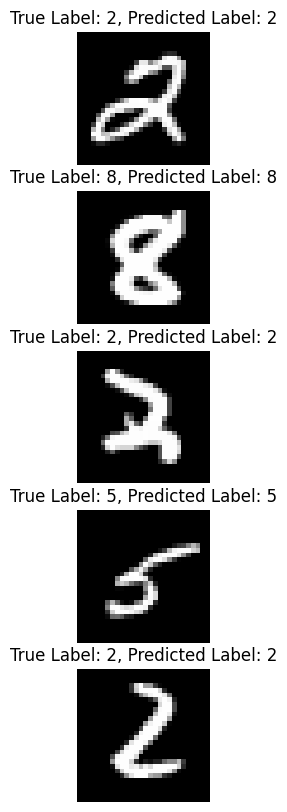

In [9]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

# 1. Load and preprocess the dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(32)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.batch(32)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)


# 2. Build the CNN model
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# 3. Compile and train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(ds_train, epochs=10, validation_data=ds_test)

# 4. Evaluate the model
loss, accuracy = model.evaluate(ds_test)
print(f'Test accuracy: {accuracy:.4f}')

# 5. Visualize predictions
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_test.take(5)):
    image = image[0].numpy() # Take the first image from the batch
    label = label[0].numpy() # Take the first label from the batch
    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = np.argmax(prediction)

    plt.subplot(5, 1, i + 1)
    plt.imshow(np.squeeze(image), cmap='gray')
    plt.title(f'True Label: {label}, Predicted Label: {predicted_label}')
    plt.axis('off')
plt.show()